### Logistic Regression

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

# Import dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['Species'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
# Set dependent and independent variables
X = data.iloc[:,[0,1,2,3]].values

# Identify Iris-setosa / not Iris-setosa
y = np.where(data['Species'] == 0, 'setosa', 'not setosa')

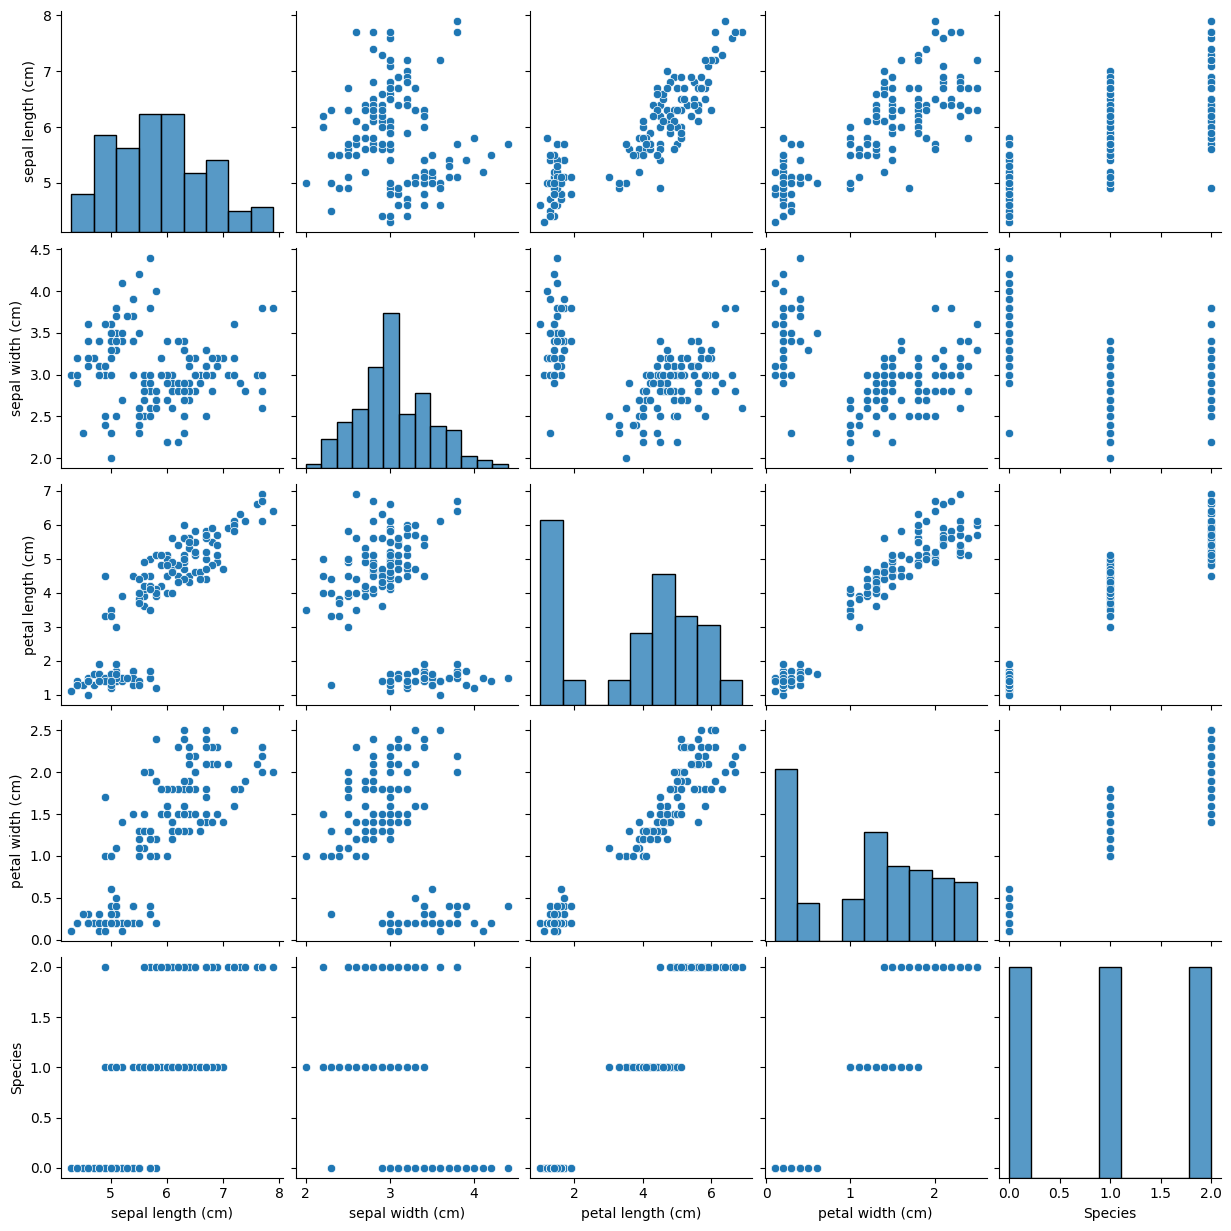

In [3]:
# Explore the data with visualisations
sns.pairplot(data=data)

In [4]:
X = X.reshape(-1, 4)
X = preprocessing.scale(X)

# Split data into training and testing set (10% as less than 200 samples)
X_train, X_test, y_train, y_test = train_test_split(X, 
                y, test_size=0.1, random_state=0)

In [5]:
# Use logistic regression to fit a model and make predictions
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

y_pred = log_reg_model.predict(X_test).reshape(-1,1)

In [6]:
# Generate a confusion matrix to compare predicted and actual
classes = ['setosa', 'not setosa']
conf_mat = confusion_matrix(y_test, y_pred)
setosa_df = pd.DataFrame(conf_mat, columns=classes, index=classes)
setosa_df


,setosa,not setosa
setosa,12,0
not setosa,0,3


# Predictions

**Acuracy**  
= (12(TP)+3(TN)) / (12(TP)+0(FN)+3(TN)+0(FP)) = 1  

**Precision**  
= 12(TP)/(12(TP)+0(FP)) = 1  
This shows that of all the predictions that it was setosa / not setosa, 100% were identified correctly as setosa / not setosa and none were predicted as setosa that were not setosa

**Recall**  
= 12(TP)/12(TP)+0(FN) = 1  
This shows that of all the predictions that it was setosa / not setosa, 100% were identified correctly as setosa / not setosa and none of these were predicted as not setosa that were setosa  

**F1-Score**  
= 2 * ((1(precision)*1(recall))/(1(precision)+1(recall))) = 1  


The Accuracy is 100%  
Precision and Recall are the same (1/100%)  
Therefore the F1 score is 1/100%  

In [7]:
# Store values for the formula
true_pos = conf_mat[0, 0]
true_neg = conf_mat[1, 1]
false_pos = conf_mat[0, 1]
false_neg = conf_mat [1, 0]

In [8]:
# Manual code to work out accuracy, preceision, recall and F1
print(f"Accuracy:\t", ((true_pos + true_neg)/(true_pos + false_neg + true_neg + false_pos)))
precision = (true_pos/(true_pos + false_pos))
recall = (true_pos/(true_pos + false_neg))
print(f"Precision:\t", (precision))
print(f"Recall:\t\t", (recall))
print(f"F1:\t\t", (((precision * recall) / (precision + recall))) * 2)

Accuracy:	 1.0
Precision:	 1.0
Recall:		 1.0
F1:		 1.0


**Analyse prediction**  
The predictions I made match the output from the acuracy, precision, recall and F1 code

In [9]:
ya = data.iloc[:,4].values

# Split data into training and testing set (50% gives more variability)
X_train, X_test, ya_train, ya_test = train_test_split(X, 
                ya, test_size=.5, random_state=0)

In [10]:
# Use logistic regression to fit a model and make predictions
log_reg_model.fit(X_train, ya_train)

ya_pred = log_reg_model.predict(X_test).reshape(-1,1)

In [11]:
# Generate a confusion matrix to compare predicted and actual
classes = list(iris.target_names)
conf_mat = confusion_matrix(ya_test, ya_pred)
df = pd.DataFrame(conf_mat, columns=classes, index=classes)
df

,setosa,versicolor,virginica
setosa,21,0,0
versicolor,0,28,2
virginica,0,4,20


**Interesting test findings**  
When setting the test size to .1 the accuracy was better (TP 3+8+4).  
The higher the test size for the whole set, the less acurate this was. e.g. at .3, the precision was lower where 1 versicolor was predicted to be verginica, at .4 the recall was lower where 4 verginica were predicted to be versicolor, and at .5 both precision and recall were lower where 2 versicolor was predicted to be verginica and 4 verginica were predicted to be versicolor.

The same did not happen when I adapted the test size for setosa / not setosa. The accuracy seemed to be maintained.

In [12]:
# Code to validate accuracy, precision, recall and F1 for 50% test size example
# use score method to get accuracy of model
score = log_reg_model.score(X_test, ya_test)
print("Accuracy: ", round(score, 2))

# average f1 score
av_f1 = f1_score(ya_test, ya_pred, average='micro')
print("F1 Score: ", av_f1)

# f1 score per class
f = f1_score(ya_test, ya_pred, average=None)
lowest_score = min(f)
hardest_class = classes[list(f).index(lowest_score)]
print("Hardest class: ", hardest_class)

# precision and recall for virginica  
prec = precision_score(ya_test == classes.index('virginica'), ya_pred == classes.index('virginica'))
rec = recall_score(ya_test == classes.index('virginica'), ya_pred == classes.index('virginica'))

print("Precision: ", round(prec, 2))
print("Recall: ", round(rec, 2))

Accuracy:  0.92
F1 Score:  0.92
Hardest class:  virginica
Precision:  0.91
Recall:  0.83
